In [3]:
from packaging import version

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import tensorboard as tb


In [3]:
tf_logs = "/data2/home/sahilkamble/project/llama3/models/Meta-Llama-3-8B-Instruct_ft_1_1split_outputs/runs/Apr29_18-35-32_user-S2600STB"
# tf_logs = "/data1/sahilkamble/llms/qlora/Llama-2-13b-hf_ft_1_3split_outputs/runs/Jan09_00-30-04_user-S2600STB"
# tf_logs = "/data1/sahilkamble/llms/qlora/Llama-2-7b-hf_ft_3_1split_outputs/runs/Jan08_02-46-26_user-S2600STB"
# tf_logs="/data1/sahilkamble/llms/qlora/Llama-2-7b-hf_ft_1_3split_outputs/runs/Jan08_15-31-22_user-S2600STB"

In [4]:
from tensorboard.backend.event_processing import event_accumulator
import os

# Path to the directory containing TF event files
log_dir = tf_logs

# Initialize an event accumulator
ea = event_accumulator.EventAccumulator(log_dir,
    size_guidance={event_accumulator.SCALARS: 0})

# Reload to read the data
ea.Reload()

# Extract eval_loss and eval_steps
eval_loss = ea.scalars.Items('eval/loss')  # Replace 'eval_loss' with the exact tag name


2024-01-10 14:07:45.455464: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-10 14:07:45.607932: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-10 14:07:45.607965: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-10 14:07:45.609356: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-10 14:07:45.625292: I tensorflow/core/platform/cpu_feature_guar

In [5]:
import numpy as np
steps = [e.step * 4 for e in eval_loss]
perp_vals = [np.exp(e.value) for e in eval_loss]

In [7]:
perp_vals[-1]

3.326673058370258

7b:- 3ps_1split : 3.49
1ep_3splits : 3.46
5_itrs : 8.53

13b:- 1ps_3splits : 3.29 
3eps_1split : 3.32
5_its : 7.46

In [8]:
step_epoch_1 = 1300
epoch_starts = [step_epoch_1, step_epoch_1 * 2, step_epoch_1 * 3]  # Replace with actual step numbers

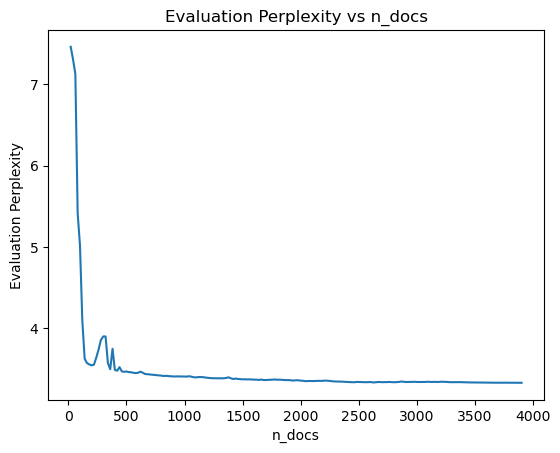

In [9]:
plt.plot(steps, perp_vals)
# for i, epoch_start in  enumerate(epoch_starts):
#     plt.axvline(x=epoch_start, color='r', linestyle='--', label=f'Epoch boundary at step {epoch_start}')
#     plt.text(epoch_start, max(perp_vals), f'Epoch {i+1}', color='red', verticalalignment='top')
plt.xlabel('n_docs')
plt.ylabel('Evaluation Perplexity')
plt.title('Evaluation Perplexity vs n_docs')
plt.show()